In [1]:
# Victor Z
# UW-Madison, 2024
# simulating the extreme value theorem (evt)

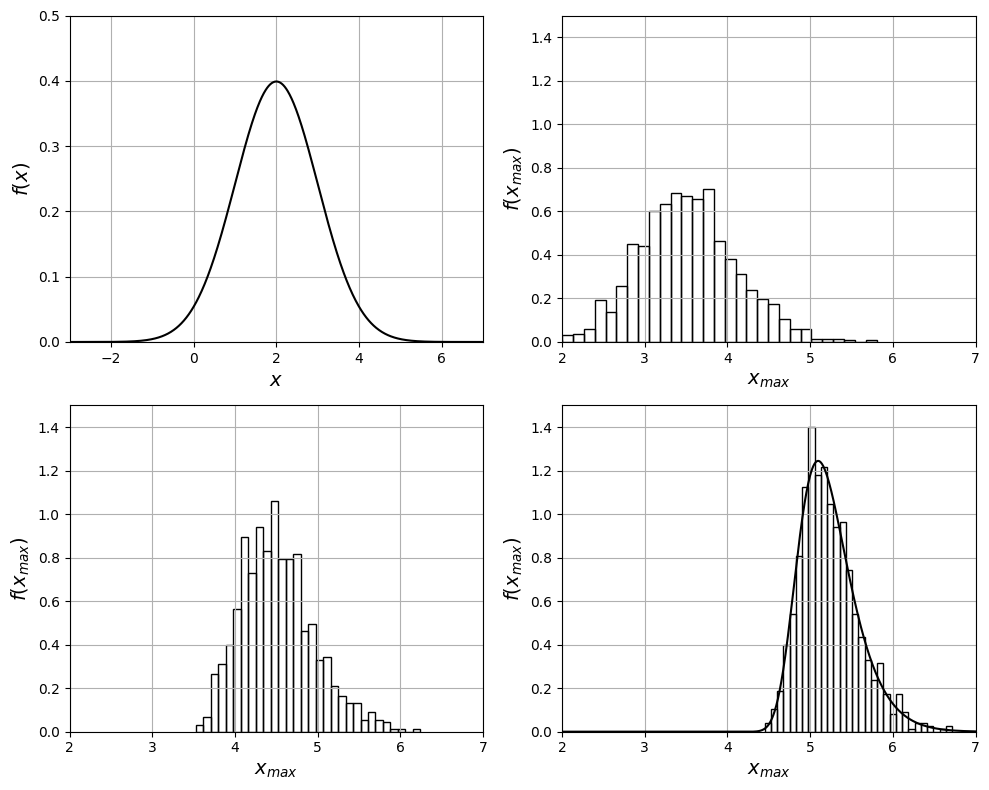

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, genextreme
import statsmodels.api as sm

# note there are discrepancies with Matlab due to use of different samples
np.random.seed(0)
N = 1000  # number of samples

plt.figure(figsize=(10, 8))

# Plot the PDF of the normal distribution
plt.subplot(2, 2, 1)
xgrid = np.linspace(2 - 5, 2 + 7, 1000)
plt.plot(xgrid, norm.pdf(xgrid, 2, 1), 'black', linewidth=1.5)
plt.xlabel(r'$x$', fontsize=14)
plt.ylabel(r'$f(x)$', fontsize=14)
plt.grid(True)
plt.axis([-3, 7, 0, 0.5])

# Simulate and plot the distribution of maximum values for S=10
S = 10
m = [np.max(np.random.normal(2, 1, S)) for _ in range(N)]

plt.subplot(2, 2, 2)
plt.hist(m, bins=30, density=True, edgecolor='black', facecolor='none', linewidth=1)
plt.xlabel(r'$x_{max}$', fontsize=14)
plt.ylabel(r'$f(x_{max})$', fontsize=14)
plt.grid(True)
plt.axis([2, 7, 0, 1.5])

# Simulate and plot the distribution of maximum values for S=100
S = 100
m = [np.max(np.random.normal(2, 1, S)) for _ in range(N)]

plt.subplot(2, 2, 3)
plt.hist(m, bins=30, density=True, edgecolor='black', facecolor='none', linewidth=1)
plt.xlabel(r'$x_{max}$', fontsize=14)
plt.ylabel(r'$f(x_{max})$', fontsize=14)
plt.grid(True)
plt.axis([2, 7, 0, 1.5])

# Simulate and plot the distribution of maximum values for S=1000
S = 1000
m = [np.max(np.random.normal(2, 1, S)) for _ in range(N)]
m = np.array(m)

# Fit the Generalized Extreme Value (GEV) distribution
gev_params = genextreme.fit(m)

xx = np.linspace(0, 7, 1000)
plt.subplot(2, 2, 4)
plt.hist(m, bins=30, density=True, edgecolor='black', facecolor='none', linewidth=1)
plt.plot(xx, genextreme.pdf(xx, *gev_params), 'black', linewidth=1.5)
plt.xlabel(r'$x_{max}$', fontsize=14)
plt.ylabel(r'$f(x_{max})$', fontsize=14)
plt.grid(True)
plt.axis([2, 7, 0, 1.5])

plt.tight_layout()
plt.show()


In [3]:
# Determine probability P(X>5)
P1 = 1 - genextreme.cdf(5, *gev_params)
print(f'P(X > 5): {P1}')

# Determine probability P(X>7)
P2 = 1 - genextreme.cdf(7, *gev_params)
print(f'P(X > 7): {P2}')

P(X > 5): 0.7266098015970848
P(X > 7): 0.0002726673780404365
